# Text Analysis using Dictionaries


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing clean_text

In [ ]:
'''
'clean_text' is a text feature created in the flat file phase 
by merging the 4 following overlapping text variables (please see an example of each):

'cuisines' - "Pub, Gastropub, German, European"
'features' - "Reservations, Seating, Table Service"
'keywords' - "milk, phone, allergies, gluten, portions"
'top_tags' - "Mid-range, German, European, Pub"

SpaCy clean techniques were implemented (during flat file phase):
    - Lowercasing
    - Removing punctuation/special characters
    - Removing stopwords
    - Keeping alphabetic tokens only
    - Lemmatizing                 - Reduces noise: treats “service”, “services”, and “servicing” as the same token
    - Removing duplicate words (keeps order)
'''

In [2]:
import pickle

In [8]:
df = pd.read_pickle('df_3_cleaned_2.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39411 entries, 0 to 39412
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  int64  
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   vegetarian_friendly                39411 non-null  Int64  
 9   vegan_options                      39411 non-null  Int64  
 10  gluten_free                        39411 non-null  Int64  
 11  open_days_per_week                 39411 non-null  float64


In [9]:
df['clean_text'].sample(100).value_counts()

clean_text
german mid range vegetarian friendly                                         15
german european mid range vegetarian friendly                                 6
german european central mid range                                             4
german central european mid range                                             4
italian pizza mediterranean european mid range                                4
                                                                             ..
italian takeout reservation seating table service serve alcohol cheap eat     1
greek european mid range vegetarian friendly                                  1
healthy hawaiian mid range vegetarian friendly                                1
german gastropub pub cheap eat                                                1
vietnamese asian mid range vegetarian friendly                                1
Name: count, Length: 67, dtype: int64

### Extracting Tokens (Words)

In [16]:
# Combine all tokens from clean_text column
all_words = ' '.join(df['clean_text'].astype(str))

# Split into individual words
words = all_words.split()

# Get unique words
unique_words = sorted(set(words))

print(f"Total unique words: {len(unique_words)}")


Total unique words: 1872


In [17]:
print(unique_words[:10])  # Preview first 30


['absolutely', 'ac', 'accept', 'accessible', 'accident', 'accompaniment', 'accompany', 'aceto', 'acidic', 'adjoining']


In [19]:
from collections import Counter

word_counts = Counter(words)
df_word_freq = pd.DataFrame(word_counts.most_common(), columns=['word', 'count'])
print(df_word_freq.head(20))




from collections import Counter
import pandas as pd

# Count tokens frequencies
word_counts = Counter(words)

# Convert to DataFrame
df_word_freq = pd.DataFrame(word_counts.most_common(500), columns=['word', 'count'])

# Print top 500 words
# print(df_word_freq)

# Optional: save to CSV
df_word_freq.to_csv('top_500_words.csv', index=False)

# Optional: get as Python list
top_500_words = df_word_freq['word'].tolist()
print(top_500_words[:100])  # preview first 


             word  count
0             mid  31312
1           range  31312
2        friendly  19123
3      vegetarian  19061
4        european  15702
5          german  15119
6         central   7533
7         italian   6866
8   mediterranean   6123
9             eat   5887
10          cheap   5841
11        seating   4334
12        service   3730
13          table   3643
14           cafe   3624
15          pizza   3376
16          asian   3274
17    reservation   3134
18          serve   2707
19        alcohol   2698
           word  count
0           mid  31312
1         range  31312
2      friendly  19123
3    vegetarian  19061
4      european  15702
..          ...    ...
495     vanilla      5
496         hot      5
497      fondue      5
498        home      5
499      europe      5

[500 rows x 2 columns]
['mid', 'range', 'friendly', 'vegetarian', 'european', 'german', 'central', 'italian', 'mediterranean', 'eat', 'cheap', 'seating', 'service', 'table', 'cafe', 'pizza', 'asian'

In [20]:
print(top_500_words[100:200])  

['nice', 'television', 'digital', 'payment', 'gift', 'argentinian', 'menu', 'chicken', 'din', 'african', 'delivery', 'irish', 'persian', 'dish', 'pasta', 'excellent', 'course', 'cake', 'dumpling', 'beef', 'curry', 'rice', 'duck', 'knuckle', 'arabic', 'main', 'music', 'delicious', 'live', 'portion', 'brunch', 'meat', 'place', 'style', 'ethiopian', 'southwestern', 'campania', 'sicilian', 'neapolitan', 'lamb', 'private', 'sausage', 'apple', 'cantonese', 'traditional', 'market', 'fish', 'buffet', 'currywurst', 'strudel', 'sauce', 'salmon', 'israeli', 'meal', 'afghani', 'peruvian', 'brazilian', 'hotel', 'lunch', 'night', 'cream', 'speciality', 'cuisine', 'pakistani', 'dinner', 'tiramisu', 'fresh', 'family', 'roll', 'amazing', 'sandwich', 'old', 'bavarian', 'dog', 'dutch', 'english', 'russian', 'waiter', 'evening', 'local', 'truffle', 'wiener', 'taste', 'pretzel', 'river', 'sauerkraut', 'nepalese', 'small', 'caribbean', 'michelin', 'british', 'czech', 'pancake', 'schweinshaxe', 'moroccan', '

In [21]:
print(top_500_words[200:300])  

['cheese', 'authentic', 'tuscan', 'visit', 'tapas', 'rib', 'swiss', 'open', 'hawaiian', 'polish', 'veal', 'sri', 'lankan', 'non', 'pho', 'tomato', 'mango', 'experience', 'ingredient', 'goulash', 'coffee', 'spring', 'cuban', 'staff', 'lovely', 'chef', 'hungarian', 'town', 'garden', 'tasty', 'star', 'shrimp', 'amuse', 'bouche', 'northern', 'quality', 'plate', 'australian', 'smoking', 'bratwurst', 'worth', 'hour', 'naan', 'black', 'octopus', 'house', 'noodle', 'mixed', 'prawn', 'roast', 'filet', 'kebab', 'germany', 'balti', 'list', 'chilli', 'typical', 'indonesian', 'pastry', 'cook', 'antipasti', 'special', 'platter', 'scandinavian', 'hummus', 'price', 'brewery', 'discover', 'tuna', 'starter', 'hong', 'kong', 'tibetan', 'recommend', 'station', 'pleasant', 'belgian', 'wurst', 'wait', 'kaiserschmarrn', 'large', 'egg', 'crispy', 'cabbage', 'sweet', 'good', 'perfection', 'saturday', 'tofu', 'halal', 'sardinian', 'flammkuchen', 'swedish', 'monday', 'mushroom', 'christmas', 'decor', 'check', 'h

In [22]:
print(top_500_words[300:400])  

['validate', 'shanghai', 'view', 'sit', 'sauerbraten', 'raman', 'liver', 'burrito', 'ravioli', 'member', 'bruschetta', 'huge', 'ambience', 'homemade', 'cajun', 'creole', 'berlin', 'fried', 'bean', 'beautiful', 'city', 'set', 'order', 'spaghetti', 'vegetable', 'forest', 'wonderful', 'big', 'georgian', 'high', 'spaetzle', 'falafel', 'carpaccio', 'prenzlauer', 'berg', 'tartare', 'breakfast', 'chilean', 'till', 'midnight', 'hall', 'pudding', 'waitress', 'canadian', 'green', 'valet', 'venison', 'potatoe', 'gnocchi', 'trout', 'late', 'sour', 'ouzo', 'skewer', 'glass', 'highly', 'reasonable', 'tourist', 'interior', 'bowl', 'bridge', 'singaporean', 'baked', 'pull', 'catalan', 'cheesecake', 'selection', 'garlic', 'wing', 'shoulder', 'wild', 'boar', 'cozy', 'ceviche', 'butter', 'pairing', 'business', 'colombian', 'waterfront', 'rhine', 'train', 'thursday', 'crepe', 'chop', 'onion', 'apfelstrudel', 'location', 'square', 'risotto', 'chip', 'dark', 'chateaubriand', 'airport', 'lazio', 'mashed', 'sm

In [23]:
print(top_500_words[400:500])  

['sum', 'kitchen', 'taiwanese', 'ukrainian', 'summer', 'terrace', 'guacamole', 'belly', 'scallop', 'mash', 'tavern', 'thali', 'friday', 'nachos', 'sommeli', 'cod', 'owner', 'oyster', 'desert', 'gyoza', 'sorbet', 'bake', 'fruit', 'munich', 'paneer', 'vitello', 'tonnato', 'romana', 'pad', 'occasion', 'centre', 'creme', 'drink', 'sea', 'egyptian', 'popular', 'dim', 'away', 'jamaican', 'gyros', 'sunday', 'veggie', 'playground', 'avocado', 'friend', 'markt', 'busy', 'area', 'wall', 'fillet', 'imperial', 'scottish', 'side', 'regional', 'perfect', 'quiche', 'cordon', 'bleu', 'tacos', 'white', 'medium', 'slice', 'scampi', 'wagyu', 'appetizer', 'danish', 'sashimi', 'tikka', 'fantastic', 'half', 'shop', 'burrata', 'presentation', 'entrecote', 'beach', 'midday', 'bun', 'twin', 'brother', 'blood', 'architecture', 'venezuelan', 'ox', 'perfectly', 'sport', 'jazz', 'adorn', 'watch', 'al', 'goat', 'attentive', 'meatloaf', 'paella', 'tapa', 'floor', 'vanilla', 'hot', 'fondue', 'home', 'europe']


### Defining Theme Dictionaries

In [ ]:
'''
In order to avoid data leakage the extrated themes concern objective descriptions like cuisine type, 
exluding subjective descriptions like "expensive" or "good ambiance"
'''

In [15]:

# Define cuisine themes
cuisine_dict = {
    'italian_food': [
        'pizza', 'pasta', 'italian', 'bruschetta', 'lasagna', 'spaghetti',
        'campania', 'sicilian', 'neapolitan', 'tiramisu', 'truffle',
        'cheese', 'authentic', 'tuscan', 'antipasti', 'sardinian', 'flamkuchen', 'tomato', 'mushroom',
        'ravioli', 'gnocchi', 'risotto', 'carpaccio', 'chateaubriand',
        'vitello', 'tonnato', 'romana', 'burrata'
    ],
    'german_food': [
        'schnitzel', 'wurst', 'pretzel', 'german', 'bavarian', 'currywurst',
        'strudel', 'schweinshaxe', 'wiener', 'sauerkraut', 'goulash', 'bratwurst',
        'cabbage', 'ham', 'sauerbraten', 'spaetzle', 'apfelstrudel', 'prenzlauer'
    ],
    'american_food': [
        'burger', 'steak', 'bbq', 'american', 'sandwich', 'southwestern',
        'beef', 'chicken', 'dog', 'rib', 'hawaiian', 'roast', 'filet', 'wing', 'meatball', 'chip', 'mashed',
        'nachos', 'tacos', 'burrito', 'bun'
    ],
    'asian_food': [
        'sushi', 'ramen', 'chinese', 'japanese', 'thai', 'vietnamese', 'korean',
        'cantonese', 'szechuan', 'dumpling', 'rice', 'duck', 'roll', 'pho', 'noodle',
        'prawn', 'tofu', 'indonesian', 'balti', 'tibetan', 'shrimp', 'raman', 'singaporean', 'shanghai',
        'taiwanese', 'gyoza', 'sashimi', 'pad', 'tikka', 'dim'
    ],
    'mediterranean_food': [
        'mediterranean', 'greek', 'lebanese', 'falafel', 'hummus', 'gyros',
        'arabic', 'israeli', 'turkish', 'tapas', 'kebab', 'tuna', 'mango', 'ouzo', 'ceviche', 'catalan',
        'guacamole', 'paella', 'tapa', 'avocado', 'egyptian', 'halal', 'kosher'
    ],
    'indian_food': [
        'indian', 'curry', 'naan', 'biryani', 'pakistani', 'balti', 'sri', 'lankan', 'cajun', 'creole',
        'thali', 'paneer'
    ],
    'latin_food': [
        'mexican', 'taco', 'burrito', 'quesadilla', 'spicy', 'southwestern', 'chilli', 'jamaican', 'venezuelan'
    ],
    'japanese_food': [
        'sushi', 'ramen', 'tempura', 'japanese', 'sauce', 'roll', 'octopus', 'tuna'
    ],
    'gourmet': [
        'ingredient',  'chef', 
        'amuse', 'bouche', 'platter', 'presentation', 'fine', 
        'truffle', 'carpaccio', 'risotto', 'tartare', 'seafood',
        'lobster', 'scallop', 'shrimp', 'prawn', 'filet', 'entrecote', 'wagyu', 'burrata', 'cheesecake',
        'strudel', 'tiramisu',  'craft'    
    ]
}

# service/amenities themes
service_dict = {
    'takeout': [
        'takeout', 'express', 'quick', 'carryout', 'pickup', 'delivery', 'open', 'outside', 'order', 'late', 'home', 'kitchen', 'shop'
    ],
    'reservations': [
        'reservation', 'booking', 'book table', 'private', 'check', 'recommend', 'member', 'tourist', 'occasion'
    ],
    'seating': [
        'dining', 'terrace', 'floor', 'playground', 'beach', 'waterfront', 'outdoor', 'highchairs', 'television', 'digital', 
        'music', 'live', 'television', 'river', 'private', 'wifi', 'garden', 'house', 'station', 'decor', 
        'view', 'bridge', 'square', 'train', 'airport', 'wall'
    ],
    'serves_alcohol': [
        'alcohol', 'wine', 'beer', 'bar', 'brew', 'cocktails', 'drinks', 'brewery', 'smoking', 'pairing', 'glass', 'sommeli', 'cordon', 'bleu'
    ],
    'delivery': [
        'delivery', 'home delivery', 'food delivery', 'pickup'
    ],
    'wifi_available': [
        'wifi', 'internet', 'digital', 'television', 'view', 'watch'
    ],
    'vegan_friendly': [
        'vegan', 'vegetarian', 'gluten', 'fresh', 'delicious', 'tofu', 'vegetable', 'green', 'veggie', 'fruit', 'avocado'
    ],
    'parking_available': [
        'parking', 'valet'
    ],
    'wheelchair_accessible': [
        'wheelchair', 'accessible', 'high'
    ],
    'table_service': [
        'waiter', 'table service', 'served', 'service at the table', 'staff', 'wait', 'chef', 'waitress', 'attentive', 'owner'
    ],
    'clean': [ 
        'fresh', 'clean', 'pure', 'sanitary', 'hygienic', 'sterile', 'spotless', 'neat', 'tidy', 'orderly', 'immaculate', 
        'polished', 'shiny', 'clear', 'crisp', 'flawless', 'bright', 'bright', 'refresh', 'scrub', 'wipe', 'wash', 'sanitize', 
        'disinfect', 'sterilize', 'cleanse', 'sanitize', 'refresh', 'scrubbed', 'dust', 'vacuum', 'detergent', 'soap', 'cleanser', 
        'wipes', 'cloth', 'broom', 'mop', 'sponges', 'cleaning', 'disinfectant', 'scrub brush'
    ]
 }

# excluded
    # 'Design': [ # look and feel of the place
    #     'atmosphere', 'interior', 'decor', 'design', 'style', 'modern', 'contemporary', 'classic', 'cozy', 'chic', 'elegant', 
    #     'rustic', 'vintage', 'industrial', 'minimalist', 'trendy', 'sleek', 'sophisticated', 'charming', 'warm', 'inviting', 
    #     'ambiance', 'spacious', 'bright', 'light', 'open', 'comfortable', 'luxurious', 'beautiful', 'relaxing', 'artistic', 
    #     'unique', 'colorful', 'welcoming', 'fresh', 'clean', 'well-designed', 'high-end', 'opulent', 'airy', 'classic', 'timeless', 
    #     'bohemian', 'modern', 'bold', 'minimalistic', 'wooden', 'metallic', 'refined', 'artisan', 'vibrant', 'sleek', 'stylish', 
    #     'polished', 'intimate', 'refined', 'soft', 'greenery', 'outdoor', 'seating', 'patio', 'terrace', 'garden', 'wall', 'flooring', 
    #     'window', 'lighting', 'space', 'design', 'layout', 'functional', 'open-plan', 'contemporary', 'mid-century', 'artisan', 
    #     'scenic', 'comfort', 'decorative', 'artwork', 'neutral', 'natural', 'earthy', 'modern', 'urban'    ]

### Create features from the dictionaries

In [19]:
import pandas as pd

# Loop over cuisines
for cuisine, keywords in cuisine_dict.items():
    df[cuisine] = df['clean_text'].apply(lambda x: int(any(word in x for word in keywords)))

# Loop over service types
for service, keywords in service_dict.items():
    df[service] = df['clean_text'].apply(lambda x: int(any(word in x for word in keywords)))


In [20]:
# Check a few rows
print(df.head(5)[['clean_text', 'italian_food', 'japanese_food', 'takeout', 'serves_alcohol']])

# Check how many restaurants fall into each category
print(df[['italian_food', 'japanese_food', 'indian_food']].sum())
print(df[['takeout', 'delivery', 'reservations']].sum())


                                          clean_text  italian_food  \
0               german mid range vegetarian friendly             0   
1        french german mid range vegetarian friendly             0   
2  german central european mid range vegetarian f...             0   
3  italian mid range vegetarian friendly gluten f...             1   
4              italian mid range vegetarian friendly             1   

   japanese_food  takeout  serves_alcohol  
0              0        0               0  
1              0        0               0  
2              0        0               0  
3              0        0               0  
4              0        0               0  
italian_food     7224
japanese_food    1534
indian_food       910
dtype: int64
takeout         2421
delivery          85
reservations    3181
dtype: int64


In [21]:
# List all new features
new_features = list(cuisine_dict.keys()) + list(service_dict.keys()) 

# Calculate percentage of 1s for each feature
percent_ones = df[new_features].mean() * 100

# Print nicely
for feature, pct in percent_ones.items():
    print(f"{feature}: {pct:.1f}%")

italian_food: 18.3%
german_food: 38.6%
american_food: 7.2%
asian_food: 9.0%
mediterranean_food: 20.6%
indian_food: 2.3%
latin_food: 1.3%
japanese_food: 3.9%
gourmet: 10.3%
takeout: 6.1%
reservations: 8.1%
seating: 12.6%
serves_alcohol: 14.0%
delivery: 0.2%
wifi_available: 1.1%
vegan_friendly: 48.7%
parking_available: 0.8%
wheelchair_accessible: 5.5%
table_service: 9.4%
clean: 0.1%


In [22]:
from scipy.stats import ttest_ind

# List all new features
new_features = list(cuisine_dict.keys()) + list(service_dict.keys())

# Loop over features and perform t-test
for feature in new_features:
    group0 = df[df['target_value'] == 0][feature]
    group1 = df[df['target_value'] == 1][feature]
    
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    print(f"{feature}: t-stat = {t_stat:.3f}, p-value = {p_val:.4f}")


italian_food: t-stat = 1.993, p-value = 0.0465
german_food: t-stat = 7.048, p-value = 0.0000
american_food: t-stat = 1.049, p-value = 0.2942
asian_food: t-stat = -0.704, p-value = 0.4818
mediterranean_food: t-stat = -1.267, p-value = 0.2054
indian_food: t-stat = -0.964, p-value = 0.3354
latin_food: t-stat = 2.922, p-value = 0.0035
japanese_food: t-stat = 1.718, p-value = 0.0861
gourmet: t-stat = -7.091, p-value = 0.0000
takeout: t-stat = -5.026, p-value = 0.0000
reservations: t-stat = 3.173, p-value = 0.0015
seating: t-stat = -7.436, p-value = 0.0000
serves_alcohol: t-stat = -1.029, p-value = 0.3036
delivery: t-stat = -0.952, p-value = 0.3412
wifi_available: t-stat = -2.507, p-value = 0.0123
vegan_friendly: t-stat = 3.301, p-value = 0.0010
parking_available: t-stat = -3.417, p-value = 0.0007
wheelchair_accessible: t-stat = -1.361, p-value = 0.1738
table_service: t-stat = 1.917, p-value = 0.0555
clean: t-stat = 0.827, p-value = 0.4081


In [23]:
import pandas as pd
from scipy.stats import ttest_ind

# List all new features
new_features = list(cuisine_dict.keys()) + list(service_dict.keys())

# Prepare an empty list to store results
results = []

# Loop over features
for feature in new_features:
    group0 = df[df['target_value'] == 0][feature]
    group1 = df[df['target_value'] == 1][feature]
    
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    
    # Percent of 1s in each group
    pct0 = f"{group0.mean() * 100:.1f}%"
    pct1 = f"{group1.mean() * 100:.1f}%"
    
    results.append({
        'feature': feature,
        '%_1_target0': pct0,
        '%_1_target1': pct1,
        't_stat': round(t_stat, 3),
        'p_value': round(p_val, 3)
    })

# Convert to DataFrame
summary_df = pd.DataFrame(results)

# Sort by p-value ascending (smallest first)
summary_df = summary_df.sort_values('p_value').reset_index(drop=True)

# Display the formatted table
print(summary_df)


                  feature %_1_target0 %_1_target1  t_stat  p_value
0             german_food       38.9%       29.9%   7.048    0.000
1                 seating       12.3%       20.6%  -7.436    0.000
2                 takeout        6.0%       10.2%  -5.026    0.000
3                 gourmet       10.1%       17.5%  -7.091    0.000
4          vegan_friendly       48.9%       44.4%   3.301    0.001
5       parking_available        0.7%        2.1%  -3.417    0.001
6            reservations        8.1%        6.0%   3.173    0.002
7              latin_food        1.3%        0.7%   2.922    0.004
8          wifi_available        1.0%        2.0%  -2.507    0.012
9            italian_food       18.4%       16.4%   1.993    0.046
10          table_service        9.5%        8.0%   1.917    0.055
11          japanese_food        3.9%        3.1%   1.718    0.086
12  wheelchair_accessible        5.5%        6.4%  -1.361    0.174
13     mediterranean_food       20.6%       22.0%  -1.267    0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39413 entries, 0 to 37232
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  float64
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   vegetarian_friendly                39411 non-null  Int64  
 9   vegan_options                      39411 non-null  Int64  
 10  gluten_free                        39411 non-null  Int64  
 11  open_days_per_week                 39411 non-null  float64


### Related to target_value:
german_food, 
seating, 
takeout, 
gourmet, 
vegan_friendly,
parking_available,
reservations,
latin_food,
wifi_available,
italian_food

In [ ]:
# !pip install wordcloud matplotlib

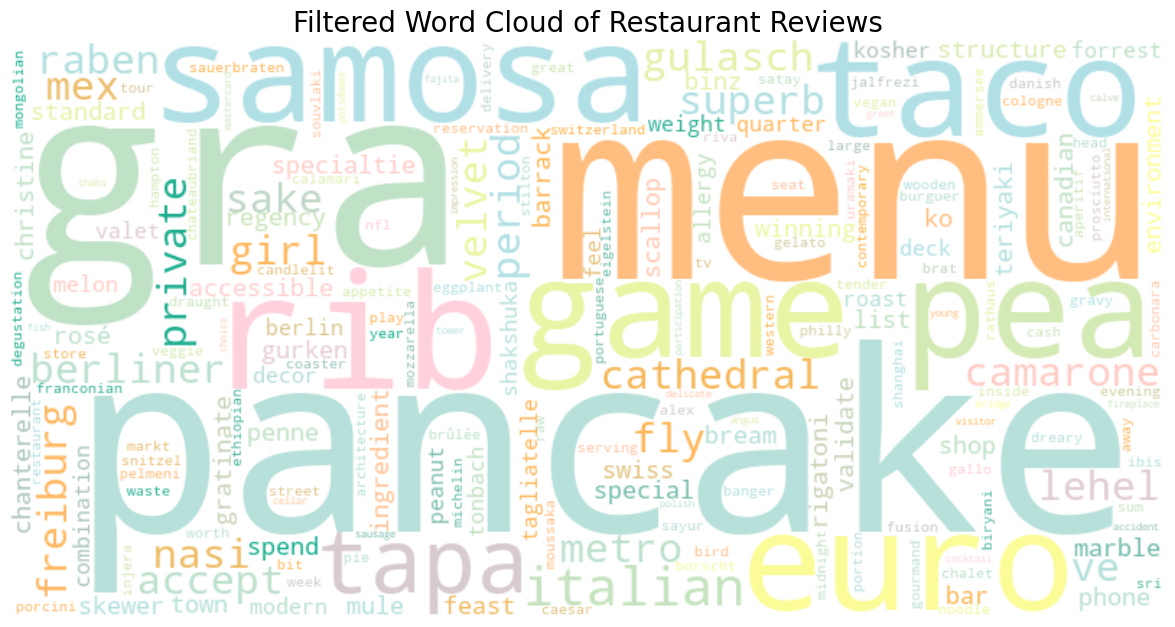

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom color palette
custom_colors = [
    "#01ab86",  # brand green
    "#FFD1DC",  # pastel pink
    "#FFB347",  # pastel orange
    "#B0E0E6",  # powder blue
    "#C1E1C1",  # light mint
    "#FDFD96"   # pale yellow
]

# Define list of features for filtering
features_to_check = [
    'german_food', 'takeout', 'seating', 'vegan_friendly', 
    'parking_available', 'reservations', 'latin_food', 
    'wifi_available', 'italian_food'
]

# Filter the rows where any of the specified features is 1
filtered_df = df[df[features_to_check].any(axis=1)]

# Function to clean and remove duplicates across all reviews
def remove_duplicates_across_reviews(texts):
    # Split each review into words, flatten them into one list, and remove duplicates
    all_words = " ".join(texts).split()
    unique_words = set(all_words)  # Remove duplicates across all reviews
    return " ".join(unique_words)

# Apply the function to remove duplicates across all reviews
filtered_text = remove_duplicates_across_reviews(filtered_df['clean_text'].dropna().tolist())

# Create a custom colormap from the list of colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette", custom_colors)

# Create the WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=custom_cmap,   # Use the custom colormap
    max_words=200
).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Filtered Word Cloud of Restaurant Reviews', fontsize=20)
plt.show()


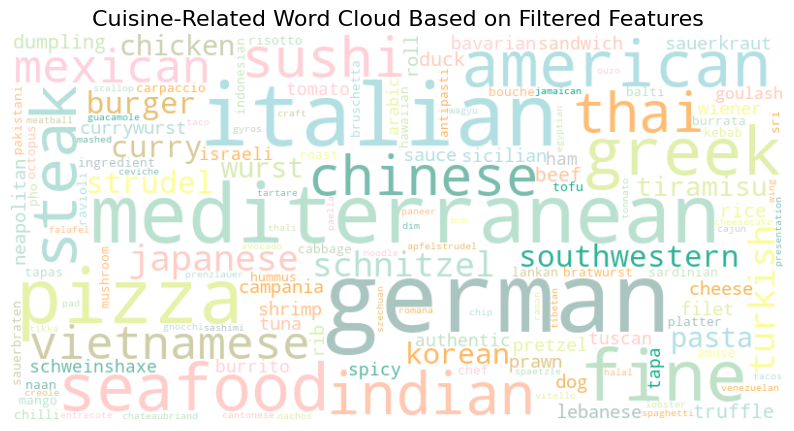

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

# Define your custom color palette
custom_colors = [
    "#01ab86",  # brand green
    "#FFD1DC",  # pastel pink
    "#FFB347",  # pastel orange
    "#B0E0E6",  # powder blue
    "#C1E1C1",  # light mint
    "#FDFD96"   # pale yellow
]

# Define list of features for filtering
features_to_check = [
    'german_food', 'takeout', 'seating', 'vegan_friendly', 
    'parking_available', 'reservations', 'latin_food', 
    'wifi_available', 'italian_food'
]



# Filter the rows where any of the specified features is 1
filtered_df = df[df[features_to_check].any(axis=1)]

# Function to extract words from the cuisine_dict for filtered reviews
def extract_cuisine_keywords(text, cuisine_dict):
    # Create a set to store matched keywords
    matched_words = []
    
    # Loop through the cuisine categories and their keywords
    for cuisine, keywords in cuisine_dict.items():
        for keyword in keywords:
            if keyword in text:
                matched_words.append(keyword)
    
    return matched_words

# Collect all cuisine-related words from the filtered reviews
all_matched_words = []
for review in filtered_df['clean_text'].dropna():
    matched_words = extract_cuisine_keywords(review, cuisine_dict)
    all_matched_words.extend(matched_words)

# Count the occurrences of each matched word
word_counts = Counter(all_matched_words)

# Create a custom colormap from the list of colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette", custom_colors)

# Create the WordCloud object using the counted words and make the font smaller
wordcloud = WordCloud(
    width=800,  # Decreased width for smaller plot
    height=400,  # Decreased height for smaller plot
    background_color='white',
    colormap=custom_cmap,  # Use the custom colormap
    max_words=500,  # Increase max words displayed
    max_font_size=100,  # Smaller max font size (default is 200)
    min_font_size=10,  # Set a lower minimum font size (adjust as needed)
    relative_scaling=0.2,  # Adjust word size scaling (lower is more uniform)
    normalize_plurals=False  # Disable plural normalization (optional, helps in keeping singular/plural versions of words)
).generate_from_frequencies(word_counts)

# Plot the word cloud with a smaller plot size
plt.figure(figsize=(10, 6))  # Smaller figsize for more compact output
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisine-Related Word Cloud Based on Filtered Features', fontsize=16)
plt.show()


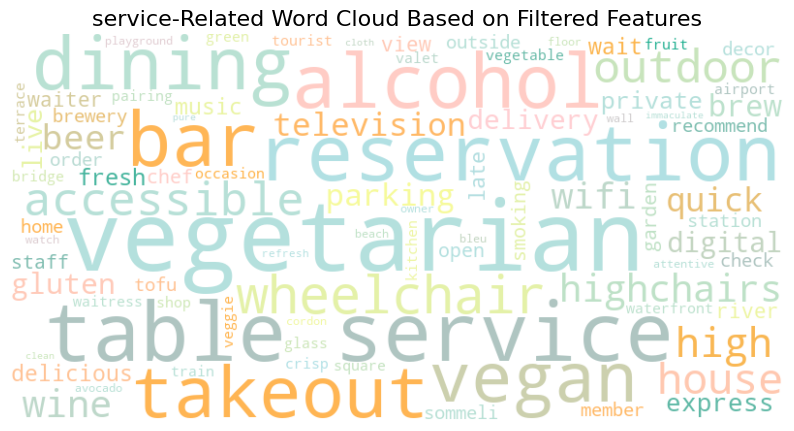

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

# Define your custom color palette
custom_colors = [
    "#01ab86",  # brand green
    "#FFD1DC",  # pastel pink
    "#FFB347",  # pastel orange
    "#B0E0E6",  # powder blue
    "#C1E1C1",  # light mint
    "#FDFD96"   # pale yellow
]

# Define list of features for filtering
features_to_check = [
    'german_food', 'takeout', 'seating', 'vegan_friendly', 
    'parking_available', 'reservations', 'latin_food', 
    'wifi_available', 'italian_food'
]



# Filter the rows where any of the specified features is 1
filtered_df = df[df[features_to_check].any(axis=1)]

# Function to extract words from the service_dict for filtered reviews
def extract_service_keywords(text, service_dict):
    # Create a set to store matched keywords
    matched_words = []
    
    # Loop through the service categories and their keywords
    for service, keywords in service_dict.items():
        for keyword in keywords:
            if keyword in text:
                matched_words.append(keyword)
    
    return matched_words

# Collect all service-related words from the filtered reviews
all_matched_words = []
for review in filtered_df['clean_text'].dropna():
    matched_words = extract_service_keywords(review, service_dict)
    all_matched_words.extend(matched_words)

# Count the occurrences of each matched word
word_counts = Counter(all_matched_words)

# Create a custom colormap from the list of colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette", custom_colors)

# Create the WordCloud object using the counted words and make the font smaller
wordcloud = WordCloud(
    width=800,  # Decreased width for smaller plot
    height=400,  # Decreased height for smaller plot
    background_color='white',
    colormap=custom_cmap,  # Use the custom colormap
    max_words=500,  # Increase max words displayed
    max_font_size=100,  # Smaller max font size (default is 200)
    min_font_size=10,  # Set a lower minimum font size (adjust as needed)
    relative_scaling=0.2,  # Adjust word size scaling (lower is more uniform)
    normalize_plurals=False  # Disable plural normalization (optional, helps in keeping singular/plural versions of words)
).generate_from_frequencies(word_counts)

# Plot the word cloud with a smaller plot size
plt.figure(figsize=(10, 6))  # Smaller figsize for more compact output
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('service-Related Word Cloud Based on Filtered Features', fontsize=16)
plt.show()


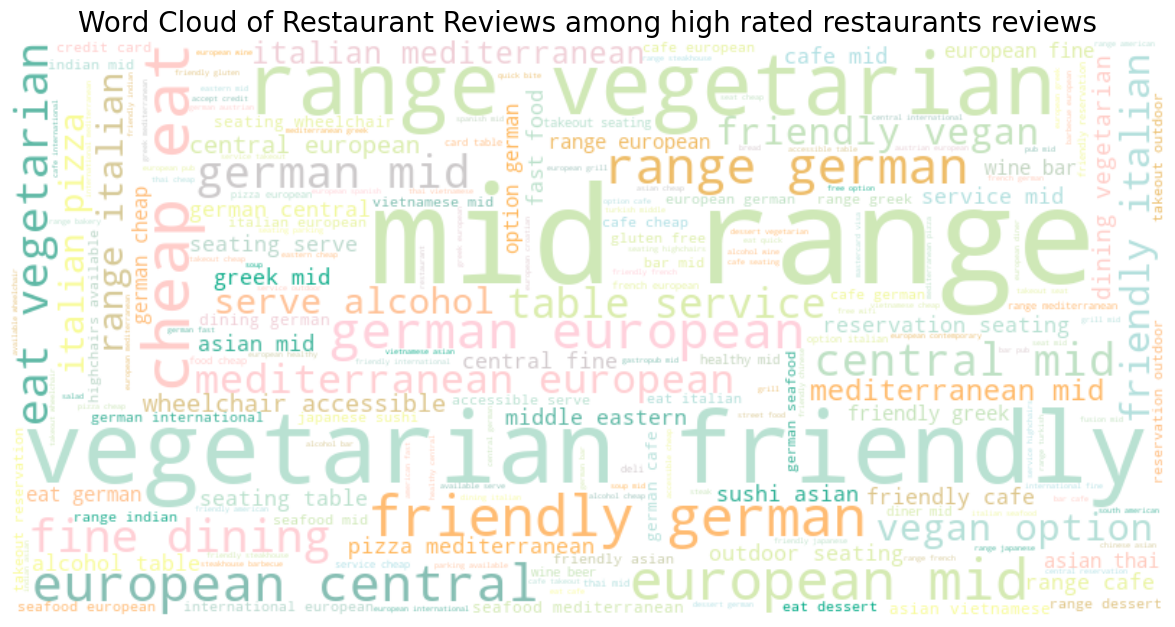

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom color palette
custom_colors = [
    "#01ab86",  # brand green
    "#FFD1DC",  # pastel pink
    "#FFB347",  # pastel orange
    "#B0E0E6",  # powder blue
    "#C1E1C1",  # light mint
    "#FDFD96"   # pale yellow
]

# Create a custom colormap from the list of colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette", custom_colors)

# Filter the dataframe for rows where target_value is 1
filtered_text = " ".join(df[df['target_value'] == 1]['clean_text'].dropna().tolist())

# Create a WordCloud object with the custom colormap
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=custom_cmap,   # Use the custom colormap
    max_words=200
).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Restaurant Reviews among high rated restaurants reviews', fontsize=20)
plt.show()


In [25]:
df.to_pickle('df_4_1.pkl')
df = pd.read_pickle('df_4_1.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39413 entries, 0 to 37232
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39411 non-null  float64
 1   restaurant_name                    39411 non-null  object 
 2   region                             39411 non-null  object 
 3   city                               39411 non-null  object 
 4   latitude                           39411 non-null  float64
 5   longitude                          39411 non-null  float64
 6   claimed                            39411 non-null  float64
 7   top_tags                           39411 non-null  object 
 8   vegetarian_friendly                39411 non-null  Int64  
 9   vegan_options                      39411 non-null  Int64  
 10  gluten_free                        39411 non-null  Int64  
 11  open_days_per_week                 39411 non-null  float64


C:\Users\dganit.haytner\AppData\Local\Temp\ipykernel_19256\1076339812.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['clean_text'].str.contains(r'\b(mid|range)\b', case=False, regex=True))


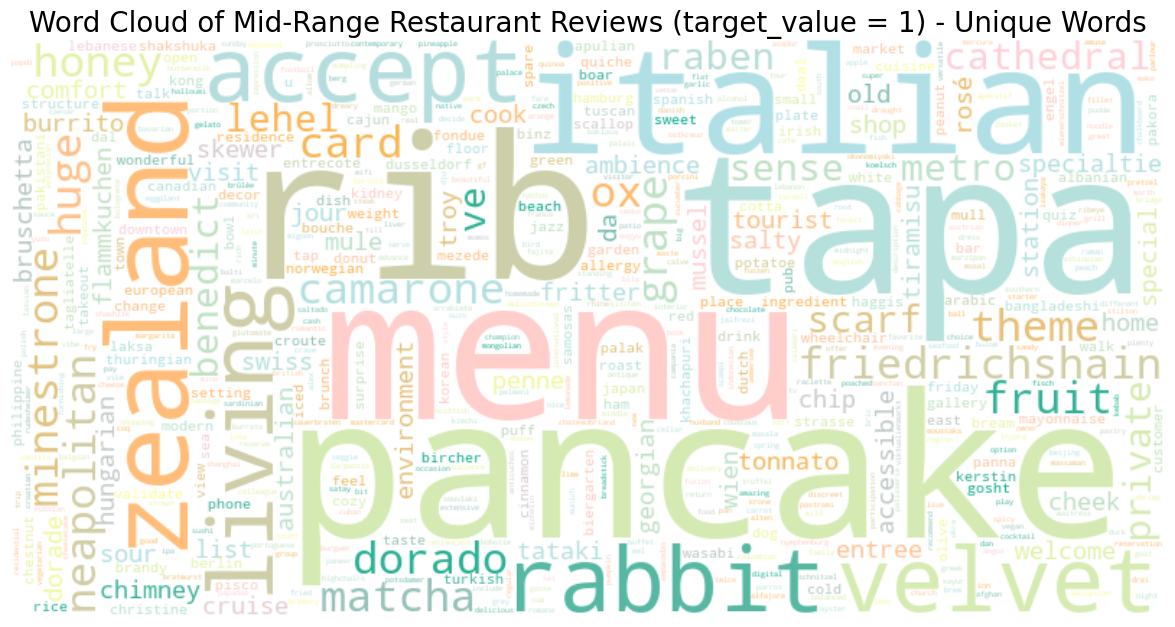

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom color palette
custom_colors = [
    "#01ab86",  # brand green
    "#FFD1DC",  # pastel pink
    "#FFB347",  # pastel orange
    "#B0E0E6",  # powder blue
    "#C1E1C1",  # light mint
    "#FDFD96"   # pale yellow
]

# Create a custom colormap from the list of colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette", custom_colors)

# Filter the dataframe for rows where target_value is 1 and clean_text contains 'mid' or 'range'
filtered_df = df[
    (df['target_value'] == 1) &
    (df['clean_text'].str.contains(r'\b(mid|range)\b', case=False, regex=True))
]

# Extract unique words
unique_words = set(" ".join(filtered_df['clean_text'].dropna().tolist()).split())

# Join unique words into a single string for the word cloud
filtered_text = " ".join(unique_words)

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=custom_cmap,
    max_words=len(unique_words)  # ensure all words are included
).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Mid-Range Restaurant Reviews (target_value = 1) - Unique Words', fontsize=20)
plt.show()

